<a href="https://colab.research.google.com/github/annafertig/Google-Playstore-Analysis/blob/main/Google_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_data = pd.read_csv('/content/drive/MyDrive/Anna/Google-Playstore.csv')
print(my_data.shape)

(2312944, 24)


In [4]:
my_data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
my_data

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [6]:
my_data['Price'].loc[my_data['Category']=='Adventure'].sum() / len(my_data['Price'].loc[my_data['Category']=='Adventure'])

0.17967864780416326

In [7]:
my_data['Price'].loc[my_data['Category']=='Adventure'].mean()

0.17967864780416326

In [8]:
category_list = my_data['Category'].unique()
print(category_list)

['Adventure' 'Tools' 'Productivity' 'Communication' 'Social'
 'Libraries & Demo' 'Lifestyle' 'Personalization' 'Racing'
 'Maps & Navigation' 'Travel & Local' 'Food & Drink' 'Books & Reference'
 'Medical' 'Puzzle' 'Entertainment' 'Arcade' 'Auto & Vehicles'
 'Photography' 'Health & Fitness' 'Education' 'Shopping' 'Board'
 'Music & Audio' 'Sports' 'Beauty' 'Business' 'Educational' 'Finance'
 'News & Magazines' 'Casual' 'Art & Design' 'House & Home' 'Card' 'Events'
 'Trivia' 'Weather' 'Strategy' 'Word' 'Video Players & Editors' 'Action'
 'Simulation' 'Music' 'Dating' 'Role Playing' 'Casino' 'Comics'
 'Parenting']


In [9]:
num_installs=[]

for i in my_data:

  num_installs.append(my_data['Installs'].loc[my_data['Category']==i])

In [10]:
df1 = my_data[['Category', 'Installs']]
df1['Installs'] = df1['Installs'].str[:-2]
df1['Installs'] = df1['Installs'].dropna()
df1=df1.dropna()
df1 = df1.replace(',','', regex=True)
df1 = df1.loc[df1['Installs']!='']
df1['Installs'] = [int(x) for x in df1['Installs']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
pie1=df1.groupby('Category').sum()
pie1

,Installs
Category,
Action,1740037231
Adventure,539011566
Arcade,1450131843
Art & Design,111639531
Auto & Vehicles,159474212
Beauty,40432561
Board,329082505
Books & Reference,482018553
Business,523662580


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


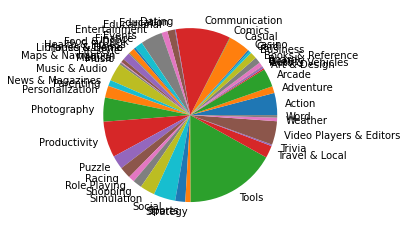

In [12]:
plt.pie(pie1, labels=pie1.index)
plt.show()

In [13]:
avg_price = []
for i in category_list:
  avg_price.append(my_data['Price'].loc[my_data['Category']==i].mean())

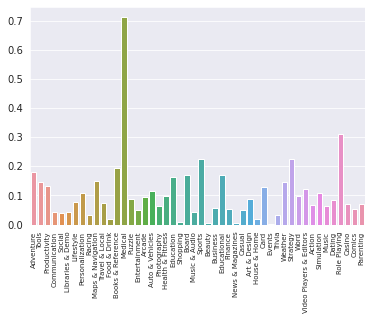

In [14]:
sns.set_style('darkgrid')
sns_bar = sns.barplot(x = category_list, y = avg_price)
sns_bar.set_xticklabels(labels=category_list,rotation=90)
sns_bar.tick_params(axis='x', which='major', labelsize=7)
sns_bar

In [15]:
rating_list = my_data['Rating'].unique()
print(rating_list)

[0.  4.4 5.  4.5 2.  4.7 4.9 3.9 3.7 4.2 3.4 3.8 4.6 4.1 2.5 2.3 2.1 2.7
 4.3 3.1 4.8 3.3 4.  2.4 3.2 3.6 2.6 nan 1.5 3.5 2.9 1.3 2.8 3.  2.2 1.8
 1.4 1.2 1.9 1.7 1.6 1.  1.1]


In [16]:
my_data['Rating'].loc[my_data['Free']==True].mean()

2.199949938090701

In [17]:
my_data['Price'].loc[my_data['Free']==False]

273        1.99
296        4.99
417        0.99
554        2.99
618        0.99
           ... 
2312658    1.99
2312686    1.49
2312703    7.99
2312803    0.99
2312927    2.49
Name: Price, Length: 45068, dtype: float64

In [18]:
list_x = ['Free', 'Not Free']
list_y = [2.199949938090701, 2.3634575500100357]

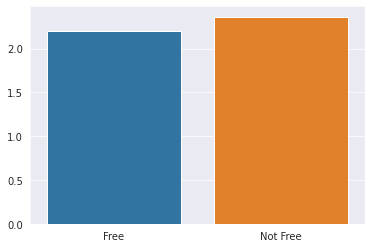

In [19]:
rawr_bar = sns.barplot(x = list_x, y = list_y)
rawr_bar